# Final output

In [1]:
import pandas as pd
import numpy as np
import re 

import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) 
#def noop(*args, **kargs): pass
#warnings.warn = noop


import logging
logging.captureWarnings(True)


import gensim
from gensim import utils, models
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
#from gensim.parsing.preprocessing import STOPWORDS as SW

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis
import pyLDAvis.gensim_models as gensimviz
from wordcloud import WordCloud


In [2]:
import pickle

file_name = "data/spacy_lemmatized_2.pkl"

open_file = open(file_name, "rb")
df = pickle.load(open_file)
open_file.close()

print('Length of df: ', len(df))



Length of df:  12492


In [3]:
word_list = ['kannabis', 'kannabiksen', 'kannabinen', 'kannabiknen', 'kannabikse', 'Kannabis']

def remove_stopwords(texts):
    return [[word for word in doc if word not in word_list] for doc in texts]

# Final Stop Words removal
data_ready = remove_stopwords(df)

# LDA Model

In [4]:
# Gensim Dictionary
# Filter out words that occur less than 5 documents, or more than 98% of the documents.

extremes_no_below = 4 
extremes_no_above = 0.99

# LDA
topic_number_set = 15
pass_set = 30
chunk_set = 2000
#alpha_set = 'symmetric', # 'asymmetric',
iteration_set= 60
probability_set=0.5
decay_set=0.1

In [5]:
# Create a id2word dictionary
#id2word = Dictionary(df['final_tokens'])
id2word = Dictionary(data_ready )
print(len(id2word))

# Filtering Extremes
id2word.filter_extremes(no_below=extremes_no_below, no_above=extremes_no_above)
print(len(id2word))

# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in data_ready ]

28615
4717


In [6]:
# developed in GESIM NLP LDA codebook
lda_model = LdaMulticore(corpus=corpus,
                       id2word=id2word,
                       num_topics= topic_number_set,
                       random_state=42,
                       chunksize=chunk_set,
                       passes=pass_set,
                       decay=decay_set,
                       #alpha = alpha,
                       iterations=iteration_set,
                       minimum_probability=probability_set) 

In [7]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]

# Create Topics
topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tulla käyttö vaikutus tutkimus maa käyttää tieto aika juuri siis

------ Topic 1 ------
huume saada tarkoittaa vain päihde pois laillinen laiton kova poliisi

------ Topic 2 ------
osa saada mieli ihan kyllä polttaa ihminen elämä tulla suuri

------ Topic 3 ------
alkoholi käyttää hyvä nuori ihminen kokeilla tulla tehdä saada jo

------ Topic 4 ------
käyttäjä huume huumeisi laillistaa tapaus laillistaminen käyttö kovempiin siirtyä rikollinen

------ Topic 5 ------
keskustelu asia aika kanta hyvä kieltolaki ottaa vihreä laillistaminen kannattaa

------ Topic 6 ------
aiheuttaa psykoosi alkoholi skitsofrenia käyttää ongelma tupakka kyllä riippuvuus tietää

------ Topic 7 ------
käyttö nuori ongelma lisääntyä hoito laillistaminen rikollisuus laillinen vuosi kasvaa

------ Topic 8 ------
saada ostaa laiton myydä laillinen valtio myynti alkoholi vero alaikäinen

------ Topic 9 ------
hamppu laillistaminen aine käyttää päästö kasvatus vain löytyä hiilijalanjälki ihan



In [8]:
# Compute Perplexity
# a measure of how good the model is. lower the better
model_perplexity = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', model_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts= data_ready, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model)


Perplexity:  -7.616795039171787

Coherence Score:  0.312350416922908


In [9]:

#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
viz=gensimviz.prepare(lda_model, corpus, id2word)
viz

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/past/builti

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.077360  0.019414       1        1  8.665784
10     0.193028 -0.090485       2        1  8.456924
7     -0.032919 -0.068011       3        1  7.997746
5      0.209856  0.034346       4        1  7.951217
8     -0.140142 -0.222959       5        1  7.702296
6     -0.155388  0.143282       6        1  7.172247
11    -0.111488 -0.082433       7        1  6.915888
12    -0.083617  0.052052       8        1  6.818613
2     -0.031001  0.121868       9        1  6.280667
14     0.131951 -0.024694      10        1  6.044387
1     -0.010209 -0.061494      11        1  5.848169
13     0.021450  0.118954      12        1  5.591726
0      0.047784  0.041067      13        1  5.456401
9      0.036409 -0.070041      14        1  4.587928
4      0.001645  0.089134      15        1  4.510007, topic_info=               Term         Freq        Total Category  logprob  loglift
329        alkoholi  1460.000000  1460.000000  Default  30.0000  30.0000
7            käyttö  1889.000000  1889.000000  Default  29.0000  29.0000
8    laillistaminen  1649.000000  1649.000000  Default  28.0000  28.0000
38            saada  1616.000000  1616.000000  Default  27.0000  27.0000
27        kannattaa   746.000000   746.000000  Default  26.0000  26.0000
..              ...          ...          ...      ...      ...      ...
111          kasvaa    35.050922   159.273562  Topic15  -5.1538   1.5851
150             syy    41.200943   339.472593  Topic15  -4.9922   0.9899
424            aine    36.345364   409.608915  Topic15  -5.1176   0.6767
16           kuinka    34.205501   275.004561  Topic15  -5.1782   1.0145
35          käyttää    34.575547  1043.868937  Topic15  -5.1675  -0.3087

[1146 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2853      8  0.896796    Päihde
2853     14  0.068984    Päihde
4646     13  0.899669      aami
3503      6  0.891913  addiktaa
1155     12  0.127549    agenda
...     ...       ...       ...
188      11  0.095147  äänestää
188      12  0.063432  äänestää
167       7  0.901915      öljy
167      13  0.045096      öljy
4451      9  0.900176    гянджа

[3060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 11, 8, 6, 9, 7, 12, 13, 3, 15, 2, 14, 1, 10, 5])

In [10]:
pyLDAvis.save_html(viz, 'data/lda.html')

# Dominant topics and in each document II


In [11]:
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/ 
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts= data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.8963,"keskustelu, asia, aika, kanta, hyvä, kieltolak...","[itseasita, erinomainen, kysymys, pilvi, yleen..."
1,1,7.0,0.5062,"käyttö, nuori, ongelma, lisääntyä, hoito, lail...","[kai, pointti, tuore, tutkimustiedonkki, laill..."
2,2,7.0,0.5749,"käyttö, nuori, ongelma, lisääntyä, hoito, lail...","[kyllä, huvittava, kuinka, lääke, kipu, lievit..."
3,3,7.0,0.8294,"käyttö, nuori, ongelma, lisääntyä, hoito, lail...","[saatiinko, ensimmäinen, poliisiministeri, kan..."
4,4,7.0,0.8296,"käyttö, nuori, ongelma, lisääntyä, hoito, lail...","[enemmän, myydä, enemmän, saada, verotulo, käy..."


In [12]:
#df_dominant_topic.isnull().values.any()
#nan_rows = df_dominant_topic[df_dominant_topic.isnull().T.any()]
#nan_rows

In [13]:
df_topic_distribution = df_dominant_topic['Dominant_Topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topics', 'Freq']
df_topic_distribution

,Topics,Freq
0,10.0,707
1,3.0,707
2,5.0,626
3,7.0,571
4,6.0,558
5,8.0,539
6,12.0,514
7,11.0,507
8,14.0,494
9,2.0,489


In [14]:
# How many tweets are classified?
df_topic_distribution['Freq'].sum()

7636

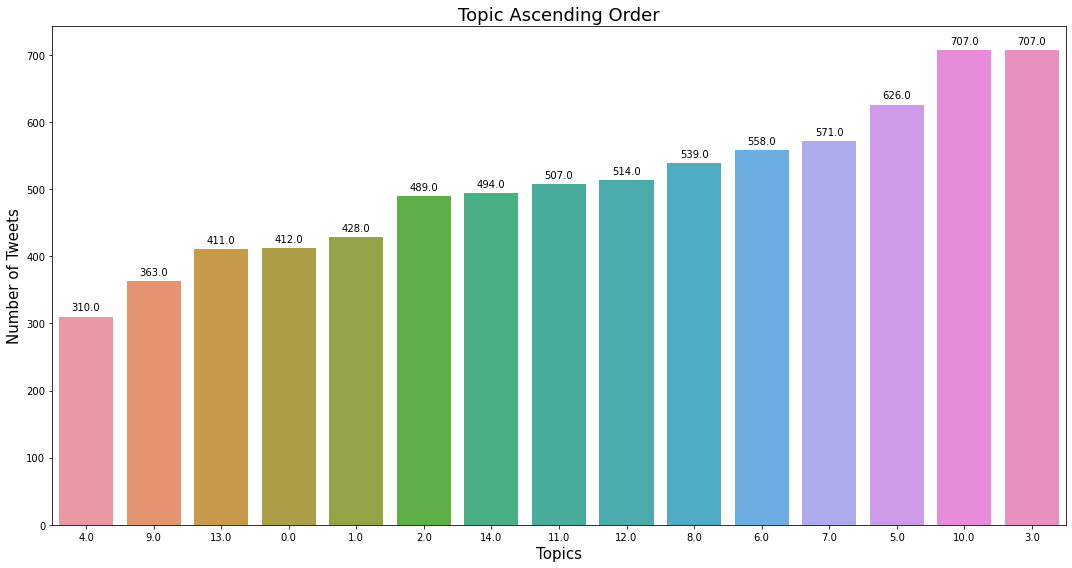

In [15]:
plt.figure(figsize=(15,8))
# make barplot and sort bars
ax= sns.barplot(x='Topics',
            y="Freq", 
            data=df_topic_distribution, 
            order=df_topic_distribution.sort_values('Freq').Topics)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# set labels
plt.xlabel("Topics", size=15)
plt.ylabel("Number of Tweets", size=15)
plt.title("Topic Ascending Order", size=18)
plt.tight_layout()
#plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)

# The most representative sentence for each topic



In [16]:
#Display setting to show more characters in column
#pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(15)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9576,"tulla, käyttö, vaikutus, tutkimus, maa, käyttä...","[sitten, eteenpäin, meinata, siis, viinankaan,..."
1,1.0,0.9555,"huume, saada, tarkoittaa, vain, päihde, pois, ...","[tietää, asia, vitun, hyvin, jengi, jaksaa, vu..."
2,2.0,0.9576,"osa, saada, mieli, ihan, kyllä, polttaa, ihmin...","[hyvii, perustelu, kiva, nähdä, keskustelu, mi..."
3,3.0,0.9594,"alkoholi, käyttää, hyvä, nuori, ihminen, kokei...","[alkoholikauppa, pimeä, laiton, laiton, myynti..."
4,4.0,0.9509,"käyttäjä, huume, huumeisi, laillistaa, tapaus,...","[arva, koliko, silti, selkeä, enemmistö, kiell..."
5,5.0,0.9594,"keskustelu, asia, aika, kanta, hyvä, kieltolak...","[päihdepsykoositapauknen, huolissasi, ajaa, al..."
6,6.0,0.9533,"aiheuttaa, psykoosi, alkoholi, skitsofrenia, k...","[salliminen, tarkoittaa, salliminen, välimalli..."
7,7.0,0.9556,"käyttö, nuori, ongelma, lisääntyä, hoito, lail...","[syntymätön, lapsi, saada, unohtaa, kannabiske..."
8,8.0,0.9627,"saada, ostaa, laiton, myydä, laillinen, valtio...","[jo, sanoa, mieto, päihde]"
9,9.0,0.9509,"hamppu, laillistaminen, aine, käyttää, päästö,...","[kerrassaan, pöyristyttävä, laillistaminen, ed..."


In [17]:
#sent_topics_sorteddf_mallet['Representative Text'][4]


# Frequency Distribution of Word Counts in Documents

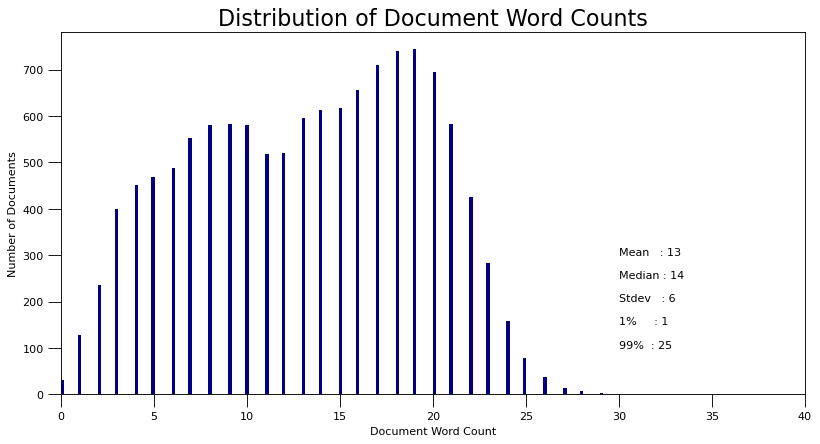

In [18]:
doc_lens = [len(d) for d in df_dominant_topic.Text]


# Plot
plt.figure(figsize=(12,6), dpi=80)
plt.hist(doc_lens, bins = 200, color='navy')
plt.text(30, 300, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(30,  250, "Median : " + str(round(np.median(doc_lens))))
plt.text(30,  200, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(30,  150, "1%     : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(30,  100, "99%  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 40), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=12)
plt.xticks(np.linspace(0,40,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=20))
plt.show()

# Word Clouds of Top N Keywords in Each Topic


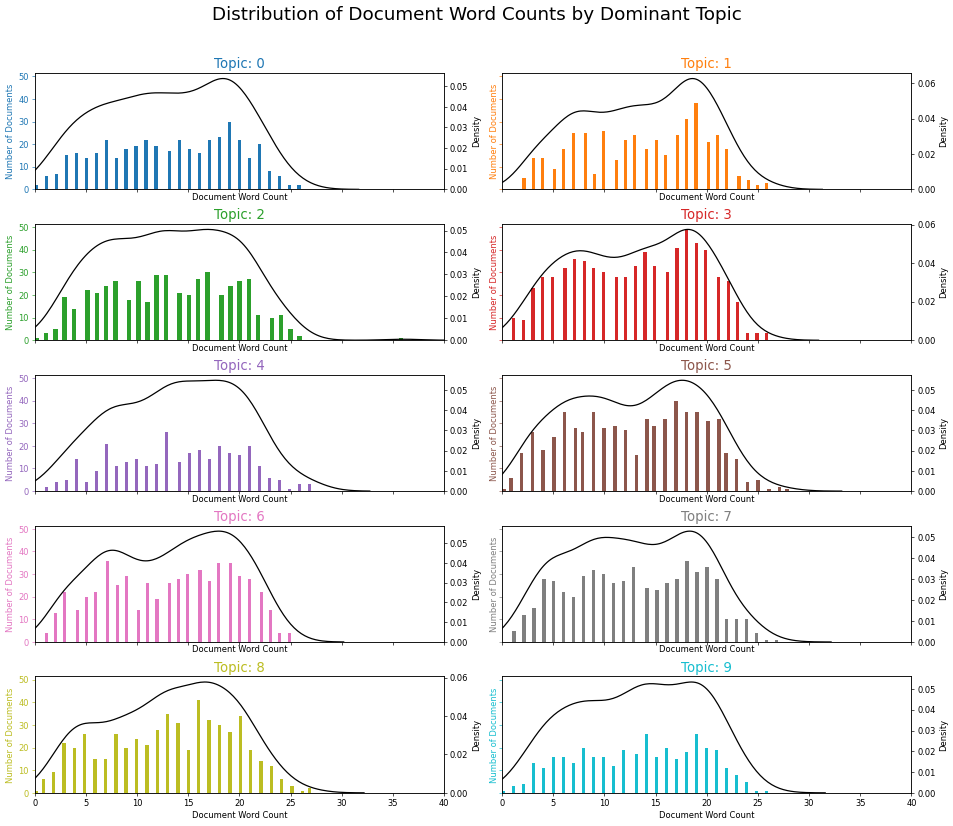

In [19]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=60, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 80, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 40), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,40,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

In [20]:
# https://www.kaggle.com/code/danielbecker/careervillage-org-recommendation-engine/notebook

from wordcloud import WordCloud

import math

def get_model_wordcloud(ldamodel, num_topics):
    """ Create a Word Cloud for each topic of the LDA model

    """  
    plot_cols = 3
    plot_rows = math.ceil(num_topics / 3)
    axisNum = 0
    plt.figure(figsize=(6*plot_cols, 4*plot_rows))
    for topicID in range(ldamodel.state.get_lambda().shape[0]):
        #gather most relevant terms for the given topic
        topics_terms = ldamodel.state.get_lambda()
        tmpDict = {}
        for i in range(1, len(topics_terms[0])):
            tmpDict[ldamodel.id2word[i]]=topics_terms[topicID,i]

        # draw the wordcloud
        wordcloud = WordCloud( margin=0,max_words=20 ).generate_from_frequencies(tmpDict)
        axisNum += 1
        ax = plt.subplot(plot_rows, plot_cols, axisNum)

        plt.imshow(wordcloud, interpolation='bilinear')
        title = topicID
        plt.title(title)
        plt.axis("off")
        plt.margins(x=0, y=0)
    plt.show()

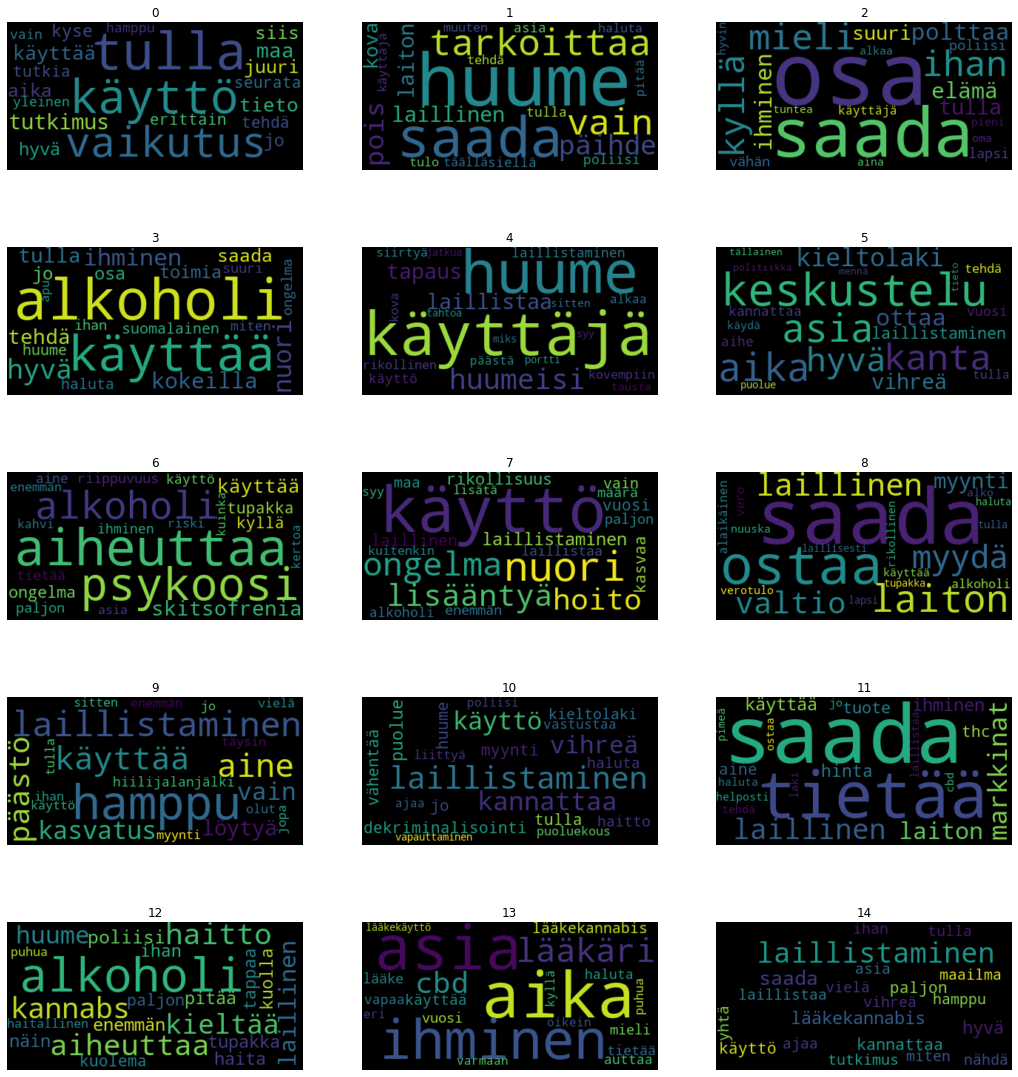

In [21]:
# plot
number_of_topics= 15 # number of topics
get_model_wordcloud(lda_model, number_of_topics)


# Word Counts of Topic Keywords

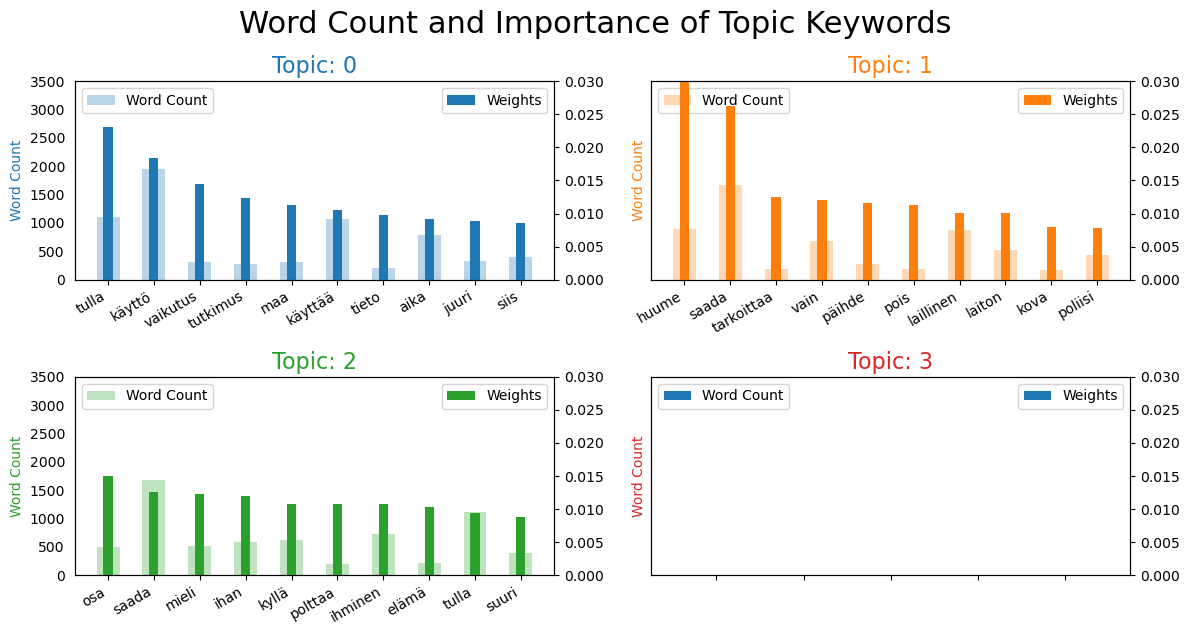

In [22]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dff = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharey=True, dpi=100)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dff.loc[dff.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()